In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, validation_split=0.1,
                    epochs=5, batch_size=128, verbose=2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
422/422 - 44s - 104ms/step - accuracy: 0.8715 - loss: 0.4047 - val_accuracy: 0.9805 - val_loss: 0.0716
Epoch 2/5
422/422 - 42s - 99ms/step - accuracy: 0.9607 - loss: 0.1319 - val_accuracy: 0.9868 - val_loss: 0.0507
Epoch 3/5
422/422 - 82s - 194ms/step - accuracy: 0.9697 - loss: 0.1000 - val_accuracy: 0.9883 - val_loss: 0.0424
Epoch 4/5
422/422 - 43s - 101ms/step - accuracy: 0.9748 - loss: 0.0819 - val_accuracy: 0.9890 - val_loss: 0.0400
Epoch 5/5
422/422 - 42s - 99ms/step - accuracy: 0.9780 - loss: 0.0716 - val_accuracy: 0.9893 - val_loss: 0.0353
313/313 - 2s - 8ms/step - accuracy: 0.9893 - loss: 0.0295
Test accuracy: 0.9893


Text(0, 0.5, 'Loss')

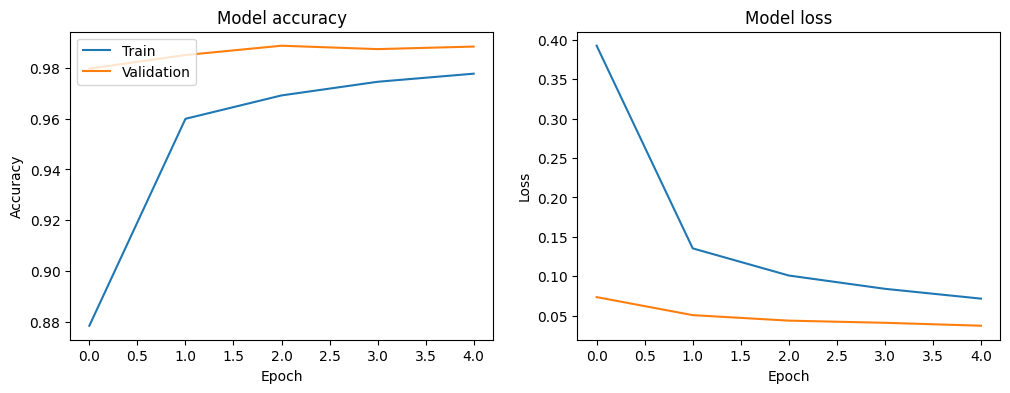

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


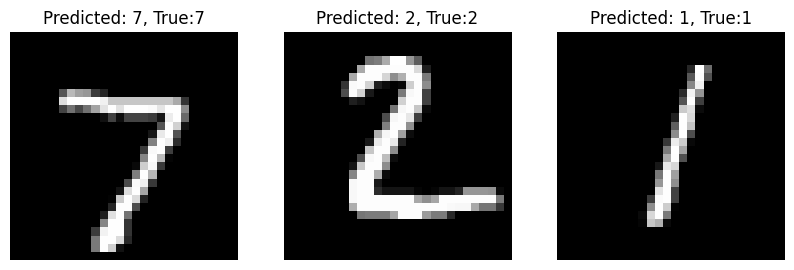

In [5]:
import numpy as np

#Predict on the test set
predictions = model.predict(x_test)

#Convert predictions to labels
predicted_labels = [tf.argmax(tf.convert_to_tensor(prediction)).numpy() for prediction in predictions]

plt.figure(figsize=(10, 4))
num_images = 3
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, True:{np.argmax(y_test[i])}")
    plt.axis('off')

plt.show()